### Problem Statement

- Develop a clustering solution to identify distinct groups of scalar learners data with various features including job role, years of experience, salary, and company name. The objective is to segment learners into cohesive clusters, unveiling underlying patterns, preferences, and characteristics within the learner population. This segmentation facilitates the customization of scaler strategies and the implementation of targeted skill development programs tailored to the unique needs of each learner cluster.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.shape

(205843, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
data.email_hash.value_counts()[:10]

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
Name: email_hash, dtype: int64

In [9]:
data[data.email_hash == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


#### Insight :
1. The dataset includes multiple rows related to learners' work experience, likely detailing their past and current positions, companies, etc.
2. However, we want to focus solely on the current profile of each learner, re,moving their entire work history segment.

In [10]:
#Sort the data by ctc_updated_year
data = data.sort_values(by=['email_hash','ctc_updated_year'])
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
84638,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019.0
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020.0
51568,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021.0,1300000,NaN,2019.0
122325,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021.0,1300000,FullStack Engineer,2019.0
53844,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021.0


In [11]:
columns_ = ['company_hash','orgyear','ctc','job_position','ctc_updated_year']
df = data.groupby('email_hash')[columns_].last().reset_index()
df.head(2)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0


In [12]:
df[df.email_hash == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
112448,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,oxej ntwyzgrgsxto rxbxnta,2018.0,720000,Data Analyst,2020.0


In [13]:
df.shape

(153443, 6)

### Missing values

In [14]:
df.isna().sum()

email_hash              0
company_hash           32
orgyear                78
ctc                     0
job_position        20224
ctc_updated_year        0
dtype: int64

In [15]:
df_filled = df.fillna(value={'company_hash':'other',
                              'job_position':'other'})

In [16]:
df_final = df_filled.dropna(subset=['orgyear'])

In [17]:
df_final = df_final.drop_duplicates()

In [18]:
df_final.shape

(153365, 6)

In [19]:
df_final.isna().sum()

email_hash          0
company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

### Outlier Detection

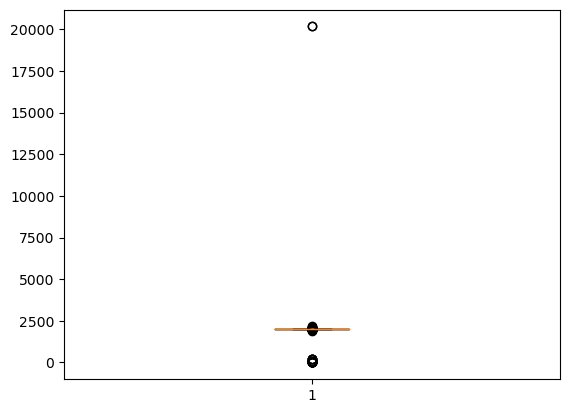

In [20]:
plt.boxplot(df_final['orgyear'])
plt.show()

In [21]:
# Calculate Q1, Q3, and IQR
Q1 = df_final['orgyear'].quantile(0.25)
Q3 = df_final['orgyear'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df_final = df_final[(df_final['orgyear'] > (Q1 - 1.5 * IQR)) & (df_final['orgyear'] < (Q3 + 1.5 * IQR))]

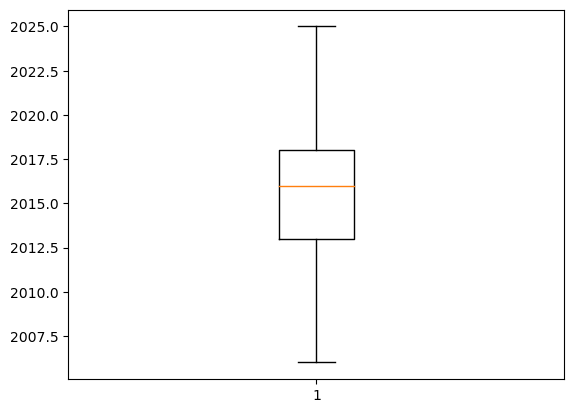

In [22]:
plt.boxplot(df_final['orgyear'])
plt.show()

- Based on the observation of the boxplot above, it appears that outliers have been successfully removed from the dataset.

### Data Cleaning

In [23]:
df_final['job_position'] = df_final['job_position'].apply(lambda x :re.sub('[^A-Za-z0-9 ]+', '', x.lower()))
df_final['company_hash'] = df_final['company_hash'].apply(lambda x :re.sub('[^A-Za-z0-9 ]+', '', x.lower()))

In [24]:
df_final.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,other,2018.0
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,450000,database administrator,2021.0


In [25]:
### Feature Engineering

In [26]:
df_final['yrs_exp'] = df_final['orgyear'].apply(lambda x: 2024-x)
df_final.head(2)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0,12.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0,11.0


### EDA

#### Univariate Analysis

In [27]:
df_final.company_hash.value_counts()

nvnv wgzohrnvzwj otqcxwto    5223
xzegojo                      3417
vbvkgz                       2444
zgn vuurxwvmrt vwwghzn       2172
wgszxkvzn                    2134
                             ... 
vhsvq untrna                    1
mhkk09                          1
vuufxot ntwyzgrgsxto            1
ou srgmvr urvnno                1
trnqvcg                         1
Name: company_hash, Length: 34588, dtype: int64

In [28]:
df_final.job_position.value_counts()

backend engineer               36617
other                          34904
fullstack engineer             21191
frontend engineer               8939
qa engineer                     5769
                               ...  
software engineer android          1
senior development engineer        1
toyota                             1
researcher                         1
solutions architect                1
Name: job_position, Length: 703, dtype: int64

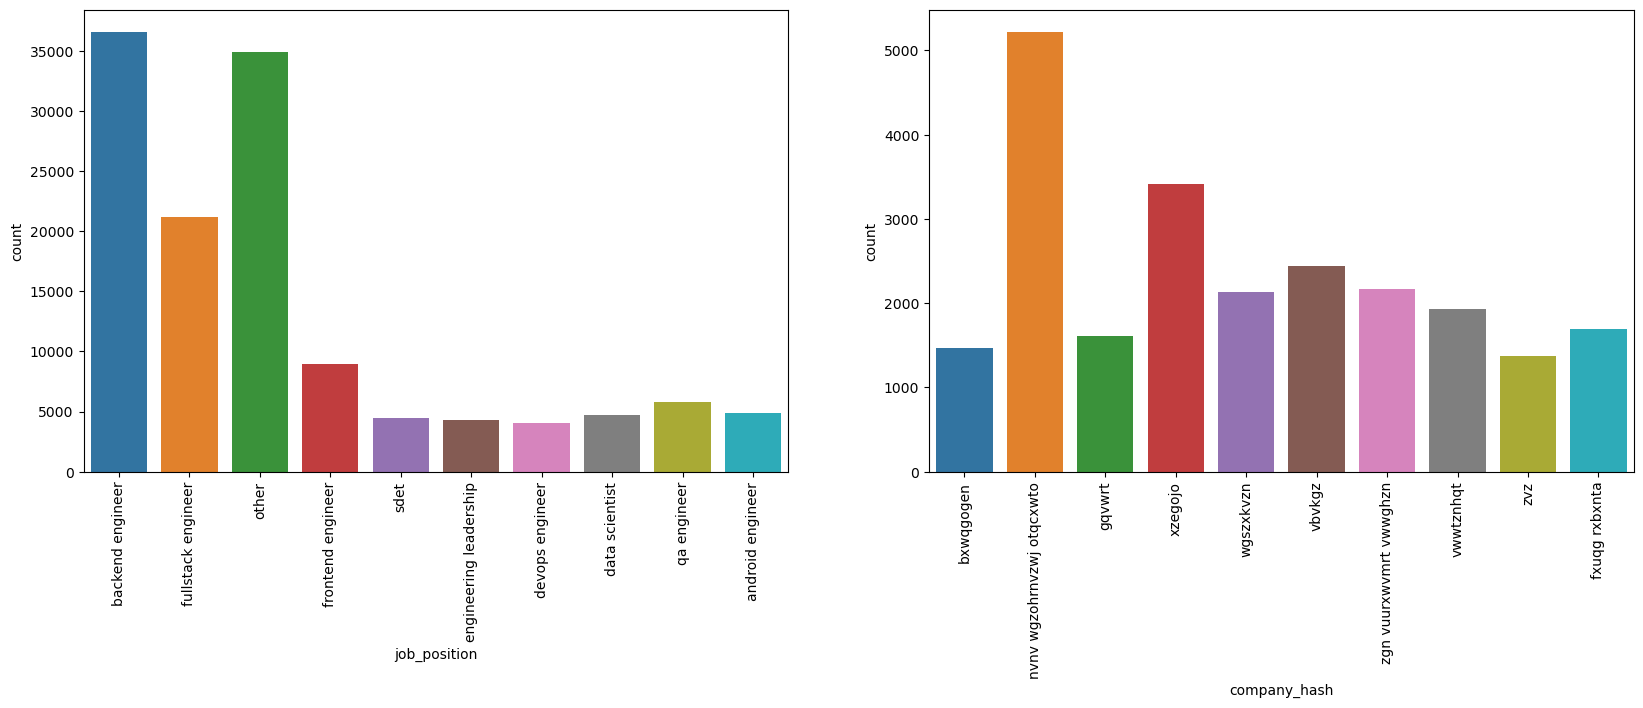

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
top_10_positions = df_final['job_position'].value_counts().nlargest(10).index
df_top_10 = df_final[df_final['job_position'].isin(top_10_positions)]
sns.countplot(x='job_position',data=df_top_10)
plt.xticks(rotation=90) 
plt.subplot(1,2,2)
top_10_companies = df_final['company_hash'].value_counts().nlargest(10).index
df_top_10 = df_final[df_final['company_hash'].isin(top_10_companies)]
sns.countplot(x='company_hash',data=df_top_10)
plt.xticks(rotation=90) 
plt.show()

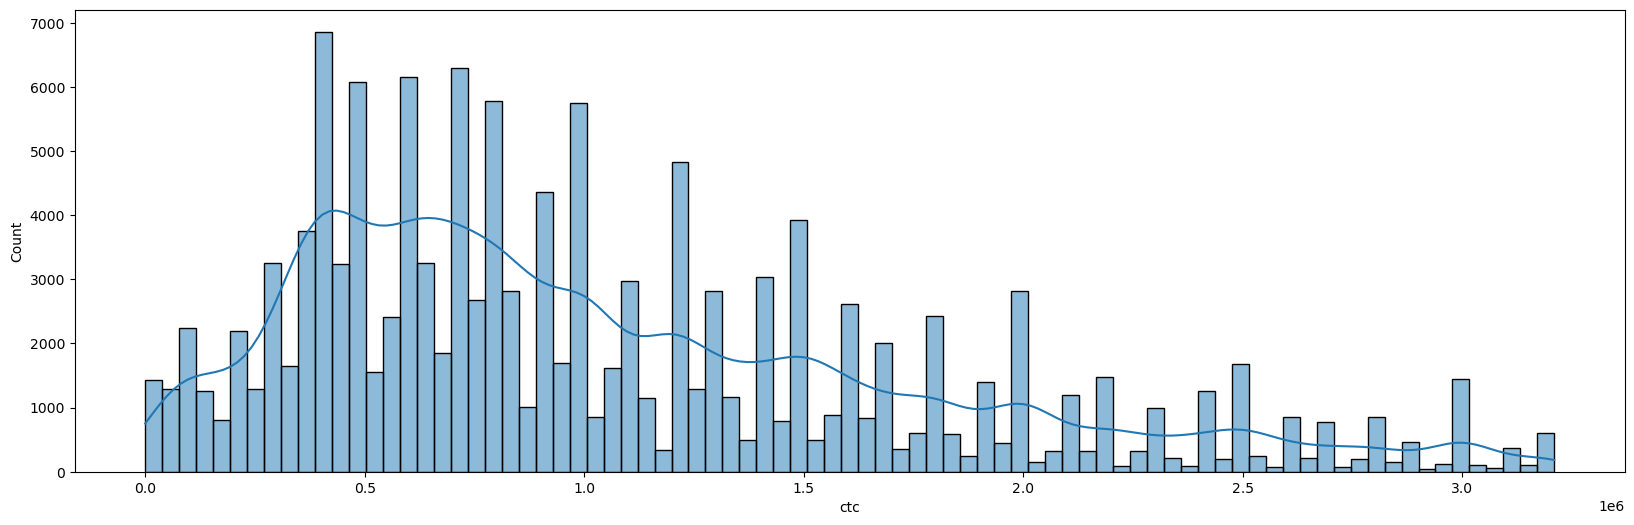

In [30]:
# Calculate Q1, Q3, and IQR
Q1 = df_final['ctc'].quantile(0.25)
Q3 = df_final['ctc'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df_ctc = df_final[(df_final['ctc'] > (Q1 - 1.5 * IQR)) & (df_final['ctc'] < (Q3 + 1.5 * IQR))]
plt.figure(figsize=(20,6))
sns.histplot(x='ctc',data=df_ctc,kde='line')
plt.show()

- The histogram of CTC indicates a right-skewed distribution, suggesting that a majority of employees have lower CTC values, while a smaller proportion of employees receive higher CTC values.

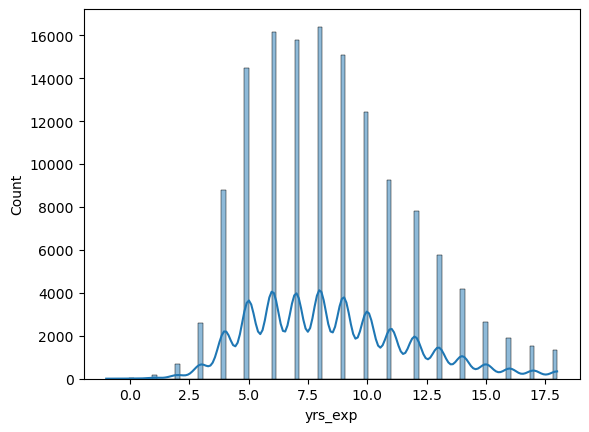

In [31]:
sns.histplot(x='yrs_exp',data=df_ctc,kde='line')
plt.show()

- The histogram of yrs_exp indicates a normal distribution

### Manual Clustering

In [32]:
# Group by 'Company', 'Job Position', and 'Years of Experience' and calculate 5-point summary
summary_stats = df_final.groupby(['company_hash', 'job_position', 'yrs_exp'])['ctc'].describe()

In [33]:
summary_stats.head()

count       mean  \
company_hash                   job_position      yrs_exp                     
0                              other             4.0        1.0   100000.0   
0000                           other             7.0        1.0   300000.0   
01 ojztqsj                     android engineer  8.0        1.0   270000.0   
                               frontend engineer 13.0       1.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  5.0        1.0  1100000.0   

                                                          std        min  \
company_hash                   job_position      yrs_exp                   
0                              other             4.0      NaN   100000.0   
0000                           other             7.0      NaN   300000.0   
01 ojztqsj                     android engineer  8.0      NaN   270000.0   
                               frontend engineer 13.0     NaN   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  5.0      NaN  1100000.0   

                                                                25%  \
company_hash                   job_position      yrs_exp              
0                              other             4.0       100000.0   
0000                           other             7.0       300000.0   
01 ojztqsj                     android engineer  8.0       270000.0   
                               frontend engineer 13.0      830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  5.0      1100000.0   

                                                                50%  \
company_hash                   job_position      yrs_exp              
0                              other             4.0       100000.0   
0000                           other             7.0       300000.0   
01 ojztqsj                     android engineer  8.0       270000.0   
                               frontend engineer 13.0      830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  5.0      1100000.0   

                                                                75%        max  
company_hash                   job_position      yrs_exp                        
0                              other             4.0       100000.0   100000.0  
0000                           other             7.0       300000.0   300000.0  
01 ojztqsj                     android engineer  8.0       270000.0   270000.0  
                               frontend engineer 13.0      830000.0   830000.0  
05mz exzytvrny uqxcvnt rxbxnta backend engineer  5.0      1100000.0  1100000.0

#### Definition:
1. Designation: Salary an employee is getting with respect to average salary in the same Company, with Job_Position & Years of Experience
2. Class: Salary an employee is getting with respect to the average salary in the same Company with Job_Position
3. Tier: Salary an employee is getting with respect to the average salary in the same Company

Designation| Class | Tier | Definition |
:--------:|:--------:|:--------:|:--------:|
   1 |   1   |   1   |If CTC > Average CTC
   2   |  2   |   2   | If CTC = Average CTC
   3   |  3   |   3   | If CTC < Average CTC

In [34]:
def get_flag(ctc,avg_ctc):
    if ctc > avg_ctc:
        return 1
    elif ctc == avg_ctc:
        return 2
    else:
        return 3  

### For designation flag

In [35]:
# Calculate average CTC for each company's department having the same Years of Experience
avg_ctc_by_company_dept_exp = df_final.groupby(['company_hash', 'job_position', 'yrs_exp'])['ctc'].mean().reset_index()
avg_ctc_by_company_dept_exp.rename(columns={'ctc': 'avg_ctc_company_dept_exp'}, inplace=True)

# Merge average CTC back to the original dataset
df_merged = pd.merge(df_final, avg_ctc_by_company_dept_exp, on=['company_hash', 'job_position',
                                                            'yrs_exp'], how='left')

#Create flag for CTC greater than average of company's department
df_merged['designation'] = df_merged.apply(lambda x:get_flag(x.ctc,x.avg_ctc_company_dept_exp),axis=1)
df_merged.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0,12.0,3.158233e+06,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0,11.0,2.500000e+05,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0,3.0,1.228200e+06,1
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,other,2018.0,15.0,3.350000e+06,1
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,450000,database administrator,2021.0,6.0,3.359725e+07,3


## For Class flag

In [36]:
# Calculate average CTC for each company's department
avg_ctc_by_company_dept = df_final.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
avg_ctc_by_company_dept.rename(columns={'ctc': 'avg_ctc_company_dept'}, inplace=True)

# Merge average CTC back to the original dataset
df_merged = pd.merge(df_merged, avg_ctc_by_company_dept, on=['company_hash', 'job_position'], how='left')
df_merged['class'] = df_merged.apply(lambda x:get_flag(x.ctc,x.avg_ctc_company_dept),axis=1)
df_merged.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0,12.0,3.158233e+06,1,2.916172e+06,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0,11.0,2.500000e+05,2,2.500000e+05,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0,3.0,1.228200e+06,1,1.284415e+06,1
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,other,2018.0,15.0,3.350000e+06,1,2.435964e+06,1
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,450000,database administrator,2021.0,6.0,3.359725e+07,3,8.526145e+06,3


## For Tier flag

In [37]:
# Calculate average CTC for each company
avg_ctc_by_company = df_final.groupby(['company_hash'])['ctc'].mean().reset_index()
avg_ctc_by_company.rename(columns={'ctc': 'avg_ctc_company'}, inplace=True)

# Merge average CTC back to the original dataset
df_merged = pd.merge(df_merged, avg_ctc_by_company, on=['company_hash'], how='left')
df_merged['tier'] = df_merged.apply(lambda x:get_flag(x.ctc,x.avg_ctc_company),axis=1)
df_merged.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0,12.0,3.158233e+06,1,2.916172e+06,1,3.271033e+06,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0,11.0,2.500000e+05,2,2.500000e+05,2,2.500000e+05,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0,3.0,1.228200e+06,1,1.284415e+06,1,1.402775e+06,3
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,other,2018.0,15.0,3.350000e+06,1,2.435964e+06,1,2.747350e+06,1
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,nvnv wgzohrnvzwj otqcxwto,2018.0,450000,database administrator,2021.0,6.0,3.359725e+07,3,8.526145e+06,3,2.105349e+06,3


##### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [38]:
filtered_df = df_merged[df_merged['tier'] == 1]
filtered_df.nlargest(10, 'ctc')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
52255,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,obvqnuqxdwgb,2018.0,255555555,other,2016.0,6.0,2.555556e+08,2,2.555556e+08,2,5.230311e+07,1
519,00eebd69d81c0bb5d4ad91392d7b994395333d98cae7f0...,wgszxkvzn,2013.0,200000000,backend engineer,2020.0,11.0,1.150454e+07,1,2.682782e+06,1,1.868563e+06,1
2009,0391b9c03e6601ce26e7257e6b9eb80a49304123a05217...,mvzp ge vbtqxwv,2014.0,200000000,devops engineer,2020.0,10.0,1.500000e+08,1,5.200000e+07,1,4.587398e+06,1
2797,04e01c24282a7262949b2efa7f1b3663aad9bfe2649232...,lubgqsvz wyvot wg,2021.0,200000000,fullstack engineer,2020.0,3.0,2.983100e+07,1,3.047013e+06,1,2.452118e+06,1
3238,05a0aec8db0d251460a2e200d835b7818e050308ef1e67...,egdwgzz,2018.0,200000000,engineering leadership,2020.0,6.0,2.000000e+08,2,2.000000e+08,2,4.097900e+07,1
3960,06c7cd6c1a50803bac81950ad450a0e78165cb7c09ddfe...,gnytqo,2018.0,200000000,product manager,2020.0,6.0,2.000000e+08,2,2.000000e+08,2,8.317267e+06,1
5389,0914aa3a4f2394bb68aabe99f5ca93c769fc3e05917752...,nvnv wgzohrnvzwj otqcxwto,2016.0,200000000,other,2020.0,8.0,2.883806e+06,1,2.584150e+06,1,2.105349e+06,1
7405,0c9c37269bd373ef507df0bc1bb318787fd895c858b74e...,xzegojo,2020.0,200000000,other,2019.0,4.0,1.382282e+06,1,2.194536e+06,1,1.611941e+06,1
7706,0d235f7e73cd9484909b32a35c69df12296a051f68ef83...,nvnv wgzohrnvzwj otqcxwto,2017.0,200000000,other,2020.0,7.0,4.307700e+06,1,2.584150e+06,1,2.105349e+06,1
8173,0df461881c039e7d8fa8db9b24f28ff190c74fed483594...,ywr ntwyzgrgsxto,2012.0,200000000,database administrator,2020.0,12.0,2.000000e+08,2,2.889000e+07,1,1.923462e+06,1


##### Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1

In [39]:
filtered_df_class = filtered_df[filtered_df['class'] == 1]
filtered_df_class.nlargest(10, 'ctc')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
519,00eebd69d81c0bb5d4ad91392d7b994395333d98cae7f0...,wgszxkvzn,2013.0,200000000,backend engineer,2020.0,11.0,1.150454e+07,1,2.682782e+06,1,1.868563e+06,1
2009,0391b9c03e6601ce26e7257e6b9eb80a49304123a05217...,mvzp ge vbtqxwv,2014.0,200000000,devops engineer,2020.0,10.0,1.500000e+08,1,5.200000e+07,1,4.587398e+06,1
2797,04e01c24282a7262949b2efa7f1b3663aad9bfe2649232...,lubgqsvz wyvot wg,2021.0,200000000,fullstack engineer,2020.0,3.0,2.983100e+07,1,3.047013e+06,1,2.452118e+06,1
5389,0914aa3a4f2394bb68aabe99f5ca93c769fc3e05917752...,nvnv wgzohrnvzwj otqcxwto,2016.0,200000000,other,2020.0,8.0,2.883806e+06,1,2.584150e+06,1,2.105349e+06,1
7405,0c9c37269bd373ef507df0bc1bb318787fd895c858b74e...,xzegojo,2020.0,200000000,other,2019.0,4.0,1.382282e+06,1,2.194536e+06,1,1.611941e+06,1
7706,0d235f7e73cd9484909b32a35c69df12296a051f68ef83...,nvnv wgzohrnvzwj otqcxwto,2017.0,200000000,other,2020.0,7.0,4.307700e+06,1,2.584150e+06,1,2.105349e+06,1
8173,0df461881c039e7d8fa8db9b24f28ff190c74fed483594...,ywr ntwyzgrgsxto,2012.0,200000000,database administrator,2020.0,12.0,2.000000e+08,2,2.889000e+07,1,1.923462e+06,1
8524,0e8f1b3c0a22d973617a78e9e6bd3ce9f7adb9ac847943...,vau,2014.0,200000000,backend engineer,2020.0,10.0,4.081200e+07,1,5.791349e+06,1,4.617310e+06,1
8814,0f0d1bf4233dadef653775c3f981f0ccde1dc20df36c43...,rtsvng ytvrny ntwyzgrgsj,2014.0,200000000,other,2020.0,10.0,1.004200e+08,1,4.061200e+07,1,9.233875e+06,1
9032,0f7322f8f4423e695df58edb4f002dac637d8de021373a...,vwwtznhqt,2013.0,200000000,other,2020.0,11.0,7.346719e+06,1,3.172017e+06,1,2.707528e+06,1


###### Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

In [40]:
filtered_df_class = filtered_df[filtered_df['class'] == 3]
filtered_df_class.nsmallest(10,'ctc')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
59585,68071ee5df5210fe9264fbad4609a751ad30dbe6fc05fc...,xmtd,2016.0,20000,fullstack engineer,2021.0,8.0,23500.0,3,23500.000000,3,19666.666667,1
114956,c8c1f770de8a330f442f7a108bb545379b78801e50958a...,xzaxvzv hzxctqoxnj mrggbxzsngz,2018.0,50000,backend engineer,2017.0,6.0,80000.0,3,80000.000000,3,47400.000000,1
12753,15cdf53fb038f1abd299891dcbfadcc8e138db8e8df650...,zgqaonqgb,2014.0,160000,fullstack engineer,2020.0,10.0,160000.0,2,186666.666667,3,151142.857143,1
4687,0802da36762cb46a23a50a2baae3646c7643d16107db59...,bwptoogz,2007.0,228000,engineering leadership,2018.0,17.0,228000.0,2,229000.000000,3,179500.000000,1
77505,877bc40cf0a748a287ea786004741351969ecfa89c7271...,tqtcbvd ntwyzgrgsxto,2014.0,300000,frontend engineer,2018.0,10.0,300000.0,2,326666.666667,3,277500.000000,1
116417,cb4e12f2415633342c8f59fefd75ce57865ec298d59b47...,bxwqgogen qtotvqwy,2020.0,300000,engineering intern,2018.0,4.0,300000.0,2,360000.000000,3,270000.000000,1
146332,ff40fe8129febdb701cb182f398828a80208feadc50b8e...,vungzrxzt rxbxnta,2018.0,300000,backend engineer,2021.0,6.0,330000.0,3,330000.000000,3,286666.666667,1
111010,c1d70e271fb32f9493d37cdb16ed52c061c527111fe169...,atuvqnbtzn ge ugono xzaxv,2016.0,310000,other,2020.0,8.0,310000.0,2,330000.000000,3,253333.333333,1
137793,f060e7d1d6314227b14de4f6cb9a6db21dbe2b038ae4f9...,vwo xzegntwy ucn rna,2016.0,340000,support engineer,2020.0,8.0,340000.0,2,345000.000000,3,322500.000000,1
4388,078654afeec80e81fa2ef096d61d9c4df59e78d3e11f97...,vqsxrad,2020.0,400000,frontend engineer,2021.0,4.0,400000.0,2,575000.000000,3,390000.000000,1


##### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [41]:
filtered_df = df_merged[df_merged['tier'] == 3]
filtered_df.nsmallest(10, 'ctc')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
30453,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,xzntqcxtfmxn,2014.0,2,backend engineer,2019.0,10.0,2.000000e+00,2,8.057896e+05,3,1.442491e+06,3
139146,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,xzntqcxtfmxn,2013.0,6,other,2018.0,11.0,1.000000e+01,3,2.075001e+06,3,1.442491e+06,3
20568,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,xzntqcxtfmxn,2013.0,14,other,2018.0,11.0,1.000000e+01,1,2.075001e+06,3,1.442491e+06,3
105823,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,xm,2016.0,15,other,2018.0,8.0,1.500000e+01,2,1.550000e+01,3,1.550000e+01,3
142174,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,hzxctqoxnj ge fvoyxzsngz,2022.0,200,fullstack engineer,2021.0,2.0,2.000000e+02,2,2.000000e+02,2,3.140000e+04,3
73638,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,nvnv wgzohrnvzwj otqcxwto,2012.0,600,backend engineer,2017.0,12.0,3.887822e+06,3,1.286389e+06,3,2.105349e+06,3
88737,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,zvz,2023.0,600,other,2019.0,1.0,2.411060e+06,3,2.770730e+06,3,2.197173e+06,3
106382,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,gjg,2018.0,600,fullstack engineer,2021.0,6.0,1.281514e+06,3,1.550927e+06,3,2.280060e+06,3
7492,0cc27665f8a9700eeeec545a88a3067b31a8d6ecb031a3...,xehnhqt,2015.0,1000,fullstack engineer,2018.0,9.0,1.000000e+03,2,1.000000e+03,2,1.005000e+05,3
23974,299f764fcae62f331f3c5eb1b451e7107302ded46e2a71...,zgn vuurxwvmrt vwwghzn,2007.0,1000,data analyst,2021.0,17.0,1.000000e+03,2,7.210790e+06,3,2.724183e+06,3


##### Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [42]:
filtered_df = df_merged[(df_merged['company_hash'] == 'xzntqcxtfmxn') & 
                        (df_merged['designation'] == 1) &
                         (df_merged['yrs_exp'].isin([5,6,7]))]
filtered_df.nlargest(10, 'ctc')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
71967,7ddd0c2f5cb9ba8eabc3054ab0394a77767d92e1616efc...,xzntqcxtfmxn,2017.0,10000000,other,2020.0,7.0,4.133333e+06,1,2.075001e+06,1,1.442491e+06,1
97943,aafdb1255d34ff8a8f8c0819a9ddd189dca6a07fe55203...,xzntqcxtfmxn,2018.0,2400000,fullstack engineer,2021.0,6.0,1.250000e+06,1,1.782500e+06,1,1.442491e+06,1
26943,2ef26883c10ccd2ba07caa111c3d6eed02fccb224854cb...,xzntqcxtfmxn,2018.0,2000000,backend engineer,2020.0,6.0,1.150000e+06,1,8.057896e+05,1,1.442491e+06,1
130689,e4224fb0c9d974e8b8cb462b253a800a73310f1392beb4...,xzntqcxtfmxn,2017.0,2000000,fullstack engineer,2020.0,7.0,1.100000e+06,1,1.782500e+06,1,1.442491e+06,1
89650,9c832621c67d590fd021852e2f62c52598d0627bf08adc...,xzntqcxtfmxn,2017.0,1500000,engineering leadership,2019.0,7.0,1.000000e+06,1,1.321000e+06,1,1.442491e+06,1
84843,94215d999389c3d7e106cc05206fc8258b583516e7736f...,xzntqcxtfmxn,2019.0,1000000,other,2020.0,5.0,5.300000e+05,1,2.075001e+06,3,1.442491e+06,3
141344,f667b946cff1582bd28fd9b70aed408597248a34eeeb1e...,xzntqcxtfmxn,2019.0,1000000,other,2020.0,5.0,5.300000e+05,1,2.075001e+06,3,1.442491e+06,3


##### Top 10 companies (based on their CTC)

In [43]:
df_merged.nlargest(10, 'avg_ctc_company')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
23987,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,whmxw rgsxwo uqxcvnt rxbxnta,2015.0,1000150000,other,2020.0,9.0,1.000150e+09,2,1.000150e+09,2,1.000150e+09,2
3983,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,aveegaxr xzntqzvnxgzvr hzxctqoxnj,2021.0,250000000,other,2020.0,3.0,2.500000e+08,2,2.500000e+08,2,2.500000e+08,2
201,005f352591238b78024ed320789c30e7815f0eea52ed98...,vbvkgz wvzvav,2020.0,200000000,other,2020.0,4.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
6121,0a5eaf16728b44b9b5c8ac562df307860433f2fc7ab003...,i wgzztin mhoxztoo ogrhnxgzo ucn rna,2017.0,200000000,other,2020.0,7.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
8243,0e1a0935c6c942c79ef6a390e06645f2a51f6285a60ef3...,ntwyzguvqp xnqvxnk xn ogrhnxgz,2015.0,200000000,database administrator,2020.0,9.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
8663,0ecafc13a8da3fd0bfee332e6d9a8dc0b048dfa35fee1c...,ctqexohayv ntwyzgrgsxto,2018.0,200000000,other,2020.0,6.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
11799,1425506ecb5764fdc996a0f0da6a2fdde6acbb59098dc3...,xxtb,2018.0,200000000,other,2020.0,6.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
13845,17cf7525d32a949efa43290fa4a95ab31d285225e61d3c...,ehlxonh,2013.0,200000000,frontend engineer,2020.0,11.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
14750,19719e6ee77db17b6a3a9e9a2b8a786aee4b865e656ff7...,touxqxn ntwyzgrgsxto ucnrna,2017.0,200000000,data analyst,2020.0,7.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2
18172,1f6eb9a9689f6d1c45352d5f290cb0fb799671c34b10f2...,qn,2012.0,200000000,engineering intern,2020.0,12.0,2.000000e+08,2,2.000000e+08,2,2.000000e+08,2


###### Top 2 positions in every company (based on their CTC)

In [44]:
df_merged.nlargest(2,'avg_ctc_company_dept')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,yrs_exp,avg_ctc_company_dept_exp,designation,avg_ctc_company_dept,class,avg_ctc_company,tier
23987,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,whmxw rgsxwo uqxcvnt rxbxnta,2015.0,1000150000,other,2020.0,9.0,1.000150e+09,2,1.000150e+09,2,1.000150e+09,2
52255,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,obvqnuqxdwgb,2018.0,255555555,other,2016.0,6.0,2.555556e+08,2,2.555556e+08,2,5.230311e+07,1


## Data Preprocessing for K-means and Hierarchical clustering

In [45]:
df_cluster = df_merged.drop(columns=['email_hash','orgyear','ctc_updated_year',
                                    'avg_ctc_company_dept_exp','avg_ctc_company_dept','avg_ctc_company'])

In [46]:
encoder = LabelEncoder()
df_cluster['company_hash'] = encoder.fit_transform(df_cluster['company_hash'])
df_cluster['job_position'] = encoder.fit_transform(df_cluster['job_position'])

In [47]:
df_cluster.head()

,company_hash,ctc,job_position,yrs_exp,designation,class,tier
0,3531,3500000,89,12.0,1,1,1
1,11555,250000,89,11.0,2,2,2
2,7246,1300000,215,3.0,1,1,3
3,6530,3400000,340,15.0,1,1,1
4,12620,450000,150,6.0,3,3,3


In [48]:
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [49]:
df_cluster_scaled = pd.DataFrame(df_cluster_scaled,columns=df_cluster.columns)

In [50]:
df_cluster_scaled.head()

,company_hash,ctc,job_position,yrs_exp,designation,class,tier
0,-1.409943,0.081214,-1.064945,1.004982,-1.610952,-1.577498,-1.691076
1,-0.639261,-0.167529,-1.064945,0.709033,-0.177459,-0.318042,-0.469890
2,-1.053128,-0.087166,-0.097071,-1.658554,-1.610952,-1.577498,0.751296
3,-1.121898,0.073561,0.863122,1.892827,-1.610952,-1.577498,-1.691076
4,-0.536971,-0.152221,-0.596371,-0.770709,1.256035,0.941415,0.751296


## Elbow Method

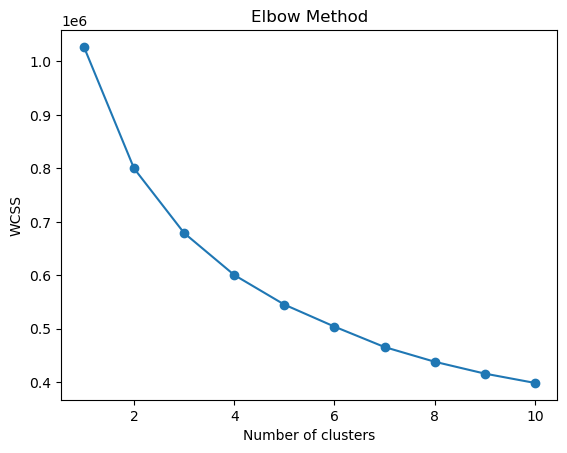

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


- By Above plot We can take 5 clusters for Kmeans

## Kmeans Clustering

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_cluster_scaled)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
print(centers)

/Users/gopalkadam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-0.08657197  0.01415666 -0.25746276  0.65761698 -0.5548975  -0.98747674
  -1.51411886]
 [-0.0311273  -0.10289956  1.31287733 -0.08488623 -0.39048506 -0.02597739
   0.28658605]
 [-0.06048126 -0.10099112 -0.64716428 -0.11898702 -0.49696995 -0.09290728
   0.35209587]
 [ 0.14888481 -0.12385903 -0.01489039 -0.35142432  1.22196137  0.93901971
   0.7252301 ]
 [ 0.0696375  10.23577493  0.40537658 -0.27386466 -0.79341302 -1.06256435
  -1.32429604]]


In [53]:
df_cluster_scaled['label'] = kmeans.predict(df_cluster_scaled)

In [54]:
df_cluster_scaled.head()

,company_hash,ctc,job_position,yrs_exp,designation,class,tier,label
0,-1.409943,0.081214,-1.064945,1.004982,-1.610952,-1.577498,-1.691076,0
1,-0.639261,-0.167529,-1.064945,0.709033,-0.177459,-0.318042,-0.469890,2
2,-1.053128,-0.087166,-0.097071,-1.658554,-1.610952,-1.577498,0.751296,2
3,-1.121898,0.073561,0.863122,1.892827,-1.610952,-1.577498,-1.691076,0
4,-0.536971,-0.152221,-0.596371,-0.770709,1.256035,0.941415,0.751296,3


## Hierarchical clustering

In [55]:
sample = df_cluster_scaled.sample(frac=0.0025,random_state=123)
#the most we could do wi

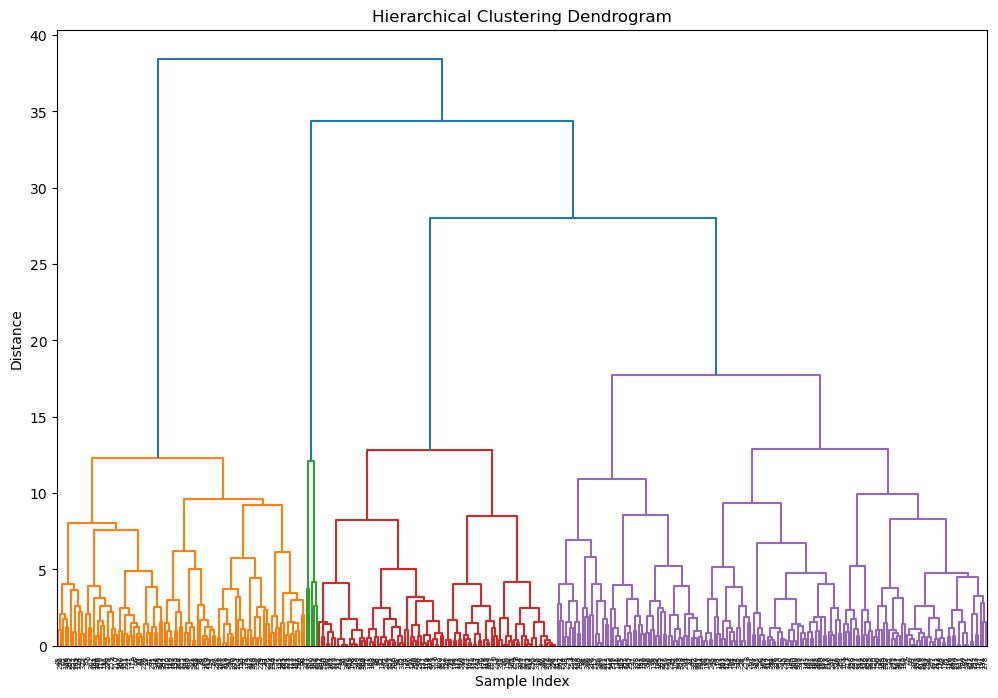

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

- By Looking at above plot we can take  5 clusters

In [57]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(sample)

sample['label_Agglo'] = agg_clustering.fit_predict(sample)
sample.head()

,company_hash,ctc,job_position,yrs_exp,designation,class,tier,label,label_Agglo
101695,-0.215310,-0.107830,-0.135479,0.413085,1.256035,0.941415,0.751296,3,1
65576,-1.719791,-0.143802,1.247199,1.300930,-0.177459,-1.577498,0.751296,1,4
18075,-0.536971,-0.102473,0.110331,1.300930,-0.177459,-1.577498,0.751296,2,0
102188,-0.897532,-0.111657,-1.587290,0.413085,-1.610952,0.941415,0.751296,2,0
66912,-0.129636,0.000851,-0.519556,0.117137,-0.177459,-0.318042,-1.691076,0,3


### Insights :

- The clustering algorithm effectively segmented scalar learners based on job roles, experience, salaries, and company names, revealing unique patterns.
- Distinct clusters emerged, reflecting diverse learner profiles, including experienced individuals with higher salaries and entry-level learners.
- Varied skill development needs were observed across clusters, suggesting tailored programs for different experience levels.
- Company affiliations significantly influenced cluster formation, indicating the impact of organizational culture on skill development needs.

### Recommendations:

- Adjust learning paths to address the specific skill gaps identified within each cluster.
- Offer targeted skill development programs aligned with learners' experience levels and preferences.
- Partner with companies to design customized skill development initiatives aligned with organizational goals.
- Implement feedback mechanisms to monitor program effectiveness and iterate based on evolving learner needs.